In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split

from imblearn.over_sampling import RandomOverSampler

In [23]:
df = pd.read_csv("weatherAUS.csv")

In [24]:
df.shape

(145460, 23)

## Preprocess data

In [25]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [26]:
df.Rainfall

0         0.6
1         0.0
2         0.0
3         0.0
4         1.0
         ... 
145455    0.0
145456    0.0
145457    0.0
145458    0.0
145459    0.0
Name: Rainfall, Length: 145460, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [28]:
(df.isnull().sum() / 145460) * 100


Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [29]:
df.Date = pd.to_datetime(df.Date)


We can see we have 4 features with a lot of Nan values. Should i get rid of them or impute them ? 

I will create new dataframe with those columns for later now I will drop them

Text(0.5, 1.0, 'Rain Tomorrow')

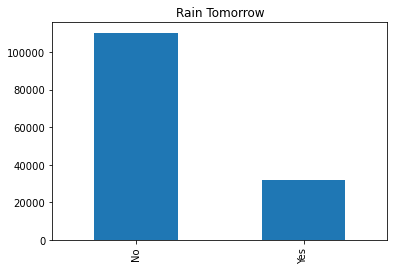

In [30]:
df.RainTomorrow.value_counts().plot(kind='bar')
plt.title("Rain Tomorrow")

We can see hudge imbalance in our output label. It may affect the accuracy of the model in the end.

### Data Viz
Lets understand the data

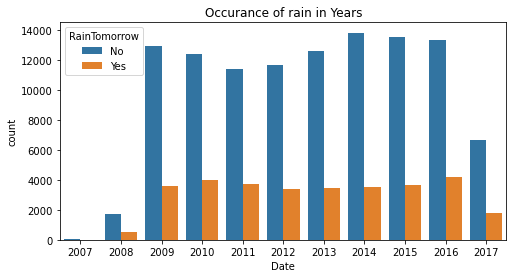

In [31]:
plt.figure(figsize=(8,4))
sns.countplot(x=df.Date.dt.year, hue=df.RainTomorrow)
plt.title("Occurance of rain in Years")
plt.show()

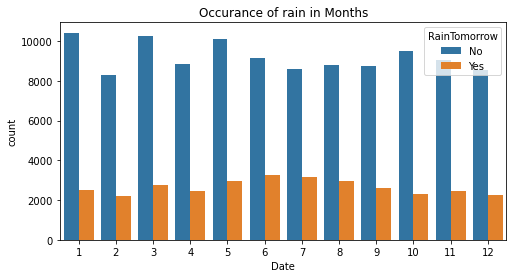

In [32]:
plt.figure(figsize=(8,4))
sns.countplot(x=df.Date.dt.month, hue=df.RainTomorrow)
plt.title("Occurance of rain in Months")
plt.show()

We can see that it rains the most in the middle of the year, but not that high in comparison to other months

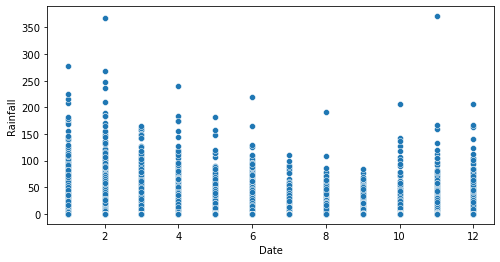

In [33]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df.Date.dt.month, y=df.Rainfall)
plt.show()

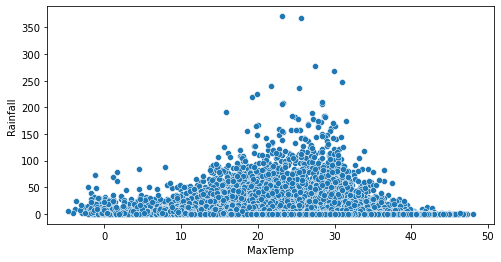

In [34]:
plt.figure(figsize=(8,4))
sns.scatterplot(x=df.MaxTemp, y=df.Rainfall)
plt.show()

I will create Difference dataframe based on Temperature, Wind Speen, Pressure, Clouds and Humidity.

In [35]:
df_diffs = pd.DataFrame()
df_diffs['Temp_diff'] = df['Temp3pm'] - df['Temp9am']
df_diffs['Wind_diff'] = df['WindSpeed3pm'] - df['WindSpeed9am']
df_diffs['Pressure_diff'] = df['Pressure3pm'] - df['Pressure9am']
df_diffs['Cloud_diff'] = df['Cloud3pm'] - df['Cloud9am']
df_diffs['Humidity_diff'] = df['Humidity3pm'] - df['Humidity9am']
df_diffs['rain'] = df.RainTomorrow

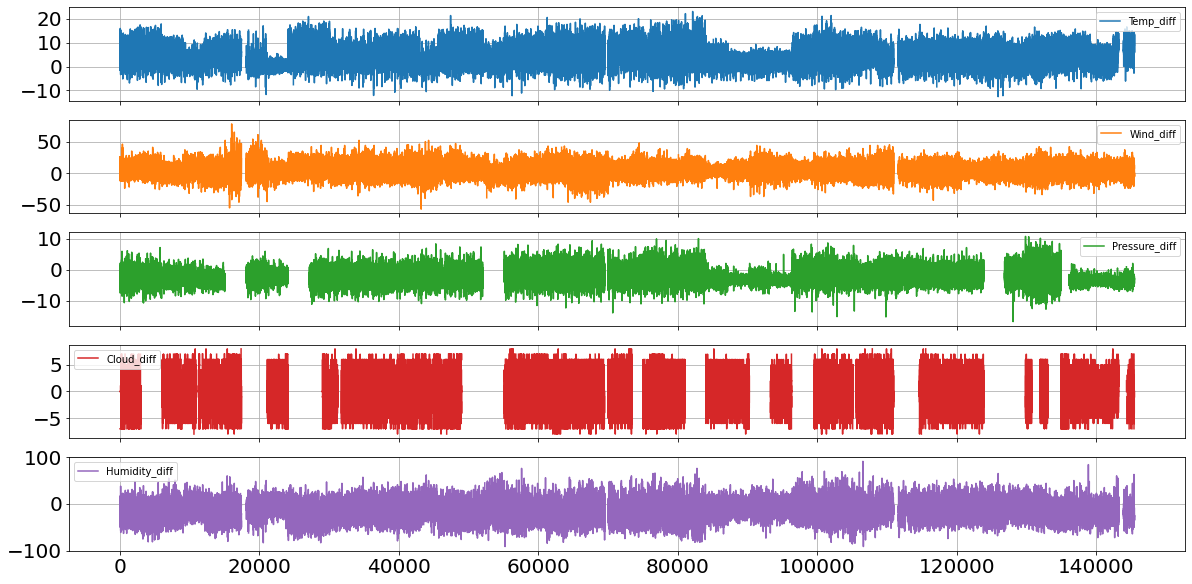

In [36]:
x = (df_diffs[['Temp_diff','Wind_diff','Pressure_diff', 'Cloud_diff', 'Humidity_diff']])
x.plot(grid =True, subplots = True,figsize = (20,10), fontsize = 20)
plt.show()

We can see we have NAN value, but the destrivution of the values is equal (+/- 10 for temp and pressure, 50 for wind and 100 for humidity)

In [37]:
df_diffs.isna().sum()

Temp_diff         4247
Wind_diff         3616
Pressure_diff    15289
Cloud_diff       63502
Humidity_diff     5274
rain              3267
dtype: int64

<AxesSubplot:>

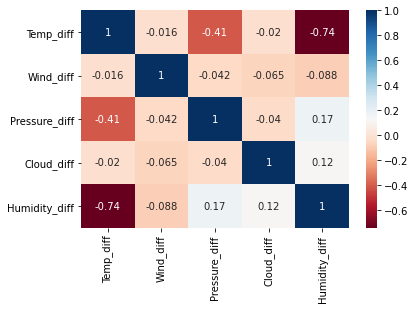

In [38]:
sns.heatmap(df_diffs.corr(), cmap = 'RdBu', annot = True)

## Make Hypothesis

### H0: We train models with the full dataset

We are going to Label encode the object columns, drop columns who miss a lot of values and predict by classifying the next day 

In [39]:
missing_data = df[['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm', 'Location', 'Date']]

In [40]:
impute_numeric = SimpleImputer(strategy="mean")
impute_label = SimpleImputer(strategy="most_frequent")

encoder = OneHotEncoder()
scaler = MinMaxScaler()

In [46]:
data_h0 = df.drop(missing_data, axis=1)

In [47]:
data_h0['RainToday'] = [1 if i=='Yes' else 0 for i in df['RainToday']]
data_h0['RainTomorrow'] = [1 if i=='Yes' else 0 for i in df['RainTomorrow']]

In [49]:
numerical = [var for var in data_h0.columns if data_h0[var].dtype!='O']
categorical = [var  for var in data_h0.columns if data_h0[var].dtype=='O']

In [51]:
numeric_data_inputed = impute_numeric.fit_transform(data_h0[numerical])
cat_data_inputed = pd.DataFrame(impute_label.fit_transform(data_h0[categorical]), columns=categorical)

In [52]:
data_h0_inputed = pd.DataFrame(numeric_data_inputed, columns=numerical)
data_h0_inputed

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.900000,0.6,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0
1,7.4,25.100000,0.0,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0
2,12.9,25.700000,0.0,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0
3,9.2,28.000000,0.0,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0
4,17.5,32.300000,1.0,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0
145456,3.6,25.300000,0.0,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0
145457,5.4,26.900000,0.0,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0
145458,7.8,27.000000,0.0,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0


In [53]:
data_h0_inputed_scaled = scaler.fit_transform(data_h0_inputed)

In [54]:
df_h0 = pd.DataFrame(data_h0_inputed_scaled, columns=numerical)
df_h0['WindGustDir'] = cat_data_inputed['WindGustDir']


In [55]:
df_h0.head(1)

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,WindGustDir
0,0.516509,0.523629,0.001617,0.294574,0.153846,0.275862,0.71,0.22,0.449587,0.48,0.508439,0.522073,0.0,0.0,W


In [56]:
x_h0 = df_h0.drop("RainTomorrow", axis = 1)
y_h0 = df_h0['RainTomorrow']

In [57]:
y_h0.value_counts()

0.0    113583
1.0     31877
Name: RainTomorrow, dtype: int64

In [58]:
enc = encoder.fit_transform(x_h0[['WindGustDir']])
x_h0 = x_h0.drop("WindGustDir", axis = 1)

for i in encoder.categories_:
    x_h0[i] = enc.todense()

In [59]:
x_h0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 29 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        145460 non-null  float64
 1   MaxTemp        145460 non-null  float64
 2   Rainfall       145460 non-null  float64
 3   WindGustSpeed  145460 non-null  float64
 4   WindSpeed9am   145460 non-null  float64
 5   WindSpeed3pm   145460 non-null  float64
 6   Humidity9am    145460 non-null  float64
 7   Humidity3pm    145460 non-null  float64
 8   Pressure9am    145460 non-null  float64
 9   Pressure3pm    145460 non-null  float64
 10  Temp9am        145460 non-null  float64
 11  Temp3pm        145460 non-null  float64
 12  RainToday      145460 non-null  float64
 13  E              145460 non-null  float64
 14  ENE            145460 non-null  float64
 15  ESE            145460 non-null  float64
 16  N              145460 non-null  float64
 17  NE             145460 non-nul

In [60]:
x_train_h0, x_test_h0, y_train_h0, y_test_h0 = train_test_split(x_h0, y_h0, test_size=0.2, stratify=y_h0)

In [61]:
x_val_h0, x_test_h0, y_val_h0, y_test_h0 = train_test_split(x_test_h0, y_test_h0, test_size=0.2, stratify=y_test_h0)

<AxesSubplot:>

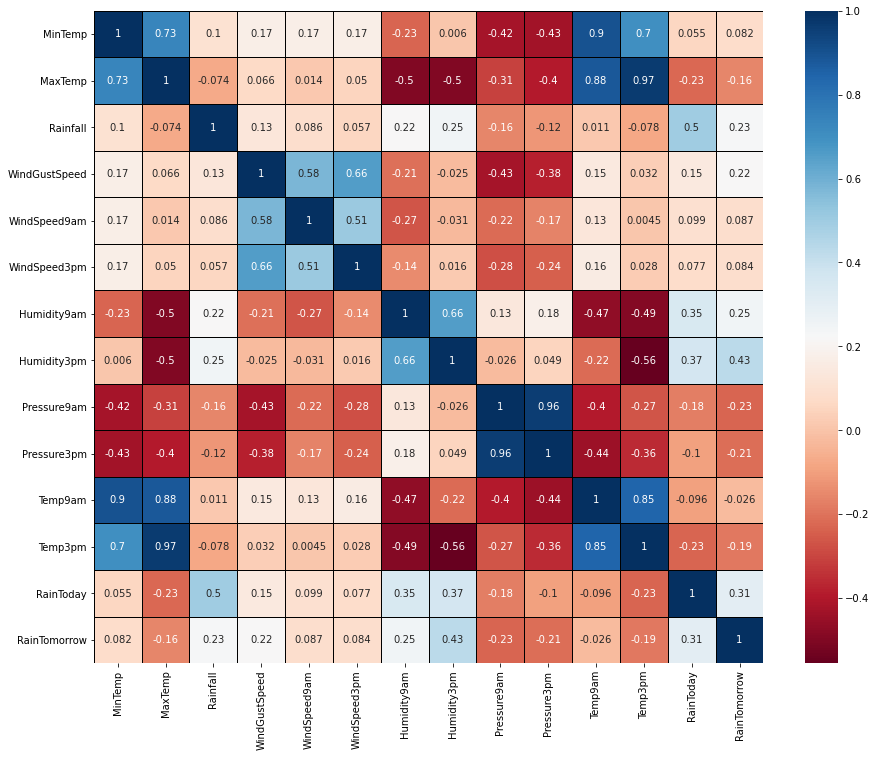

In [62]:
plt.figure(figsize=(15, 12))
sns.heatmap(data_h0_inputed.corr(), cmap = 'RdBu', annot = True, linewidths=1, linecolor='black')

### H1: Ovesample the data

In [63]:
scaler_h1 = MinMaxScaler()
scaler_h1_pca = MinMaxScaler()

In [64]:
x_h1 = data_h0_inputed.drop("RainTomorrow", axis=1)
y_h1 = data_h0_inputed.RainTomorrow

In [65]:
x_scaled = scaler_h1.fit_transform(x_h1)
x_scaled.shape

(145460, 13)

In [66]:
oversample = RandomOverSampler(sampling_strategy='all')
x_train_over, y_trian_over = oversample.fit_resample(x_scaled, y_h1)

In [67]:
y_trian_over.value_counts()

0.0    113583
1.0    113583
Name: RainTomorrow, dtype: int64

In [68]:
x_train_h1, x_test_h1, y_train_h1, y_test_h1 = train_test_split(x_train_over, y_trian_over, test_size=0.3, stratify=y_trian_over)

### H2: Time Series

In [69]:
data_h2 = df.copy()
data_h2.set_index("Date")
data_2 = data_h2[['RainToday']].set_index(df.Date)

In [70]:
data_2.replace({'No': 0, 'Yes': 1},inplace = True)

In [71]:
time_test = data_2.tail(int(145460*0.2))

In [72]:
data_2

,RainToday
Date,
2008-12-01,0.0
2008-12-02,0.0
2008-12-03,0.0
2008-12-04,0.0
2008-12-05,0.0
...,...
2017-06-21,0.0
2017-06-22,0.0
2017-06-23,0.0


In [73]:
for lag in range(1, 30):
    data_2["RainToday_lag{}".format(lag)] = data_2["RainToday"].shift(lag)
    time_test["RainToday_lag{}".format(lag)] = time_test['RainToday'].shift(lag)
data_2 = data_2.dropna()
time_test = time_test.dropna()
data_2

/tmp/ipykernel_31800/1298324753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_test["RainToday_lag{}".format(lag)] = time_test['RainToday'].shift(lag)
/tmp/ipykernel_31800/1298324753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  time_test["RainToday_lag{}".format(lag)] = time_test['RainToday'].shift(lag)
/tmp/ipykernel_31800/1298324753.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

,RainToday,RainToday_lag1,RainToday_lag2,RainToday_lag3,RainToday_lag4,RainToday_lag5,RainToday_lag6,RainToday_lag7,RainToday_lag8,RainToday_lag9,...,RainToday_lag20,RainToday_lag21,RainToday_lag22,RainToday_lag23,RainToday_lag24,RainToday_lag25,RainToday_lag26,RainToday_lag27,RainToday_lag28,RainToday_lag29
Date,,,,,,,,,,,,,,,,,,,,,
2009-01-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2009-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2009-01-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2009-01-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009-01-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-06-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [74]:
train_x_h2 = data_2.drop("RainToday", axis=1)
train_y_h2 = data_2.RainToday

test_x_h2 = time_test.drop("RainToday", axis=1)
test_y_h2 = time_test.RainToday

## Experiments

### H0:  Test models with the whole data

In [75]:
def GetModelScores (estimator, X_train, X_test, y_train, y_test):
    scores_train = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    scores_test = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    
    model = estimator
    model.fit(X_train, y_train)
    
    prediction_train = model.predict(X_train)
    prediction_test = model.predict(X_test)
    
    try:
        score_train = model.predict_proba(X_train)[:,1]
        roc_train= roc_auc_score(y_train, score_train, average = "weighted")
    except:
        roc_train = 0
        
    try:
        score_test = model.predict_proba(X_test)[:,1]
        roc_test= roc_auc_score(y_test, score_test, average = "weighted")
    except:
        roc_test = 0
    
    
    
    scores_train['Accuracy'] = accuracy_score(y_train, prediction_train)*100,
    scores_train['F1 Score'] = f1_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Precision'] = precision_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Recall'] = recall_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['ROC_AUC'] = roc_train*100
    
       
    scores_test['Accuracy'] = accuracy_score(y_test, prediction_test)*100,
    scores_test['F1 Score'] = f1_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Precision'] = precision_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Recall'] = recall_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['ROC_AUC'] = roc_test*100
    
    print(scores_train)
    print(scores_test)

In [93]:
def GetOnlyScores (estimator, y_test, X_test, y_train, X_train):
    scores_train = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    scores_test = pd.DataFrame(columns= ['Accuracy','F1 Score','Precision','Recall','ROC_AUC'])
    
    prediction_train = estimator.predict(X_train)
    prediction_test = estimator.predict(X_test)
    
    try:
        score_train = estimator.predict_proba(X_train)[:,1]
        roc_train= roc_auc_score(y_train, score_train, average = "weighted")
    except:
        roc_train = 0
        
    try:
        score_test = estimator.predict_proba(X_test)[:,1]
        roc_test= roc_auc_score(y_test, score_test, average = "weighted")
    except:
        roc_test = 0
    
   
    scores_train['Accuracy'] = accuracy_score(y_train, prediction_train)*100,
    scores_train['F1 Score'] = f1_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Precision'] = precision_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['Recall'] = recall_score(y_train, prediction_train, average = "weighted")*100,
    scores_train['ROC_AUC'] = roc_train*100
       
    scores_test['Accuracy'] = accuracy_score(y_test, prediction_test)*100,
    scores_test['F1 Score'] = f1_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Precision'] = precision_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['Recall'] = recall_score(y_test, prediction_test, average = "weighted")*100,
    scores_test['ROC_AUC'] = roc_test*100

    
    print(scores_train)
    print(scores_test)

In [76]:
GetModelScores(LogisticRegression(), x_train_h0, x_val_h0, y_train_h0, y_val_h0)

    Accuracy   F1 Score  Precision     Recall   ROC_AUC
0  84.066926  82.717355  82.897453  84.066926  85.10737
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  83.770893  82.361153  82.531107  83.770893  84.616613


/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [77]:
GetModelScores(RandomForestClassifier(), x_train_h0, x_val_h0, y_train_h0, y_val_h0)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  99.992266  99.992265  99.992267  99.992266  99.991018
    Accuracy   F1 Score  Precision     Recall   ROC_AUC
0  84.832209  83.548583  83.839692  84.832209  86.55878


In [78]:
GetModelScores(KNeighborsClassifier(), x_train_h0, x_val_h0, y_train_h0, y_val_h0)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.527499  86.805623  86.957141  87.527499  92.955748
   Accuracy   F1 Score  Precision    Recall    ROC_AUC
0  82.86856  81.838961  81.602898  82.86856  80.176118


In [79]:
GetModelScores(DecisionTreeClassifier(), x_train_h0, x_val_h0, y_train_h0, y_val_h0)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  99.993985  99.993984  99.993985  99.993985  99.999983
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  77.278391  77.458064  77.653933  77.278391  67.568946


In [80]:
GetModelScores(SVC(), x_train_h0, x_val_h0, y_train_h0, y_val_h0)

    Accuracy  F1 Score  Precision     Recall  ROC_AUC
0  84.382304  82.41345  83.577059  84.382304        0
    Accuracy   F1 Score  Precision     Recall  ROC_AUC
0  84.028703  82.000356  83.091964  84.028703        0


In [81]:
GetModelScores(LGBMClassifier(), x_train_h0, x_val_h0, y_train_h0, y_val_h0)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  85.834594  84.795462  85.023159  85.834594  88.701078
   Accuracy   F1 Score  Precision    Recall   ROC_AUC
0  84.77635  83.607325  83.759829  84.77635  86.73108


In [82]:
params_tree = {
    "n_estimators": [200],
    "max_depth": [120]
}

In [83]:
gs_tree = GridSearchCV(RandomForestClassifier(), params_tree, cv=5, scoring="f1")


In [84]:
gs_tree.fit(x_train_h0, y_train_h0)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [120], 'n_estimators': [200]},
             scoring='f1')

In [85]:
gs_tree.best_estimator_

RandomForestClassifier(max_depth=120, n_estimators=200)

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


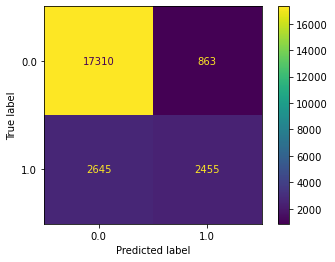

In [86]:
plot_confusion_matrix(gs_tree, x_val_h0, y_val_h0)

In [99]:
params_lgbm = {
    "learning_rate": [0.1],
    "n_estimators": [100, 200, 300],
    "num_leaves": [15, 30, 60, 120]
}

In [100]:
gs_lgbm = GridSearchCV(LGBMClassifier(), params_lgbm, cv=5, scoring="f1")
gs_lgbm.fit(x_train_h0, y_train_h0)
gs_lgbm.best_estimator_

LGBMClassifier(n_estimators=300, num_leaves=120)

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


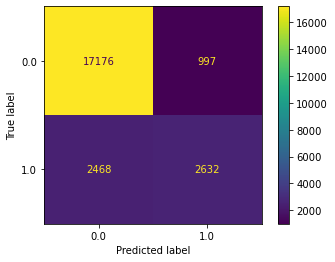

In [101]:
plot_confusion_matrix(gs_lgbm, x_val_h0, y_val_h0)

In [102]:
GetOnlyScores(gs_lgbm, y_val_h0, x_val_h0, y_train_h0, x_train_h0)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  92.281383  91.932629  92.218949  92.281383  97.214413
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  85.111503  84.146573  84.169128  85.111503  87.145568


In [98]:
GetOnlyScores(gs_lgbm, y_val_h0, x_val_h0, y_train_h0, x_train_h0)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  87.848893  87.064494  87.357365  87.848893  92.432705
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  85.072831  84.053923  84.117405  85.072831  87.079911


It looks like the data, as big as it is, really good describes the target value. The basic models even can distinguish it.

### H1: Test models with low
 dimensional data

In [ ]:
x_train_h1.shape

(116368, 13)

In [90]:
GetModelScores(DecisionTreeClassifier(), x_train_h1, x_test_h1, y_train_h1, y_test_h1)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  99.986165  99.986165  99.986168  99.986165  99.999969
    Accuracy   F1 Score  Precision     Recall   ROC_AUC
0  89.537784  89.491229   90.25105  89.537784  89.54017


In [91]:
GetModelScores(LGBMClassifier(), x_train_h1, x_test_h1, y_train_h1, y_test_h1)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  79.968054  79.963573  79.994885  79.968054  88.556441
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  79.474688  79.470408  79.499288  79.474688  87.882072


In [ ]:
GetModelScores(RandomForestClassifier(),  x_train_h1, x_test_h1, y_train_h1, y_test_h1)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  99.989309  99.989309  99.989311  99.989309  99.992538
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  93.492296  93.484516  93.701035  93.492296  98.591148


In [ ]:
GetModelScores(KNeighborsClassifier(),  x_train_h1, x_test_h1, y_train_h1, y_test_h1)

   Accuracy   F1 Score  Precision    Recall    ROC_AUC
0  87.36668  87.326108   87.85136  87.36668  95.848718
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  80.691123  80.635117  81.050328  80.691123  88.733996


In [106]:
params_tree = {
    "n_estimators": [100, 150],
    "max_depth": [40, 80]
}

In [107]:
gs_tree_h1 = GridSearchCV(RandomForestClassifier(), params_tree, cv=5, scoring="f1")

In [108]:
gs_tree_h1.fit(x_train_h1, y_train_h1)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 40, 80, 120],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1')

In [109]:
gs_tree_h1.best_estimator_

RandomForestClassifier(max_depth=80, n_estimators=150)

In [103]:
forest_over = RandomForestClassifier()
forest_over.fit(x_train_h1, y_train_h1)

RandomForestClassifier()

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


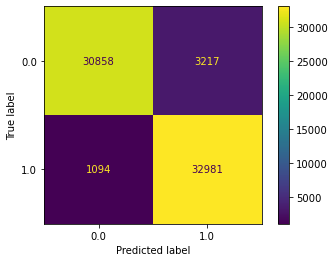

In [110]:
plot_confusion_matrix(gs_tree_h1, x_test_h1, y_test_h1)

In [111]:
GetOnlyScores(gs_tree_h1, y_test_h1, x_test_h1, y_train_h1, x_train_h1)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  99.986165  99.986165  99.986168  99.986165  99.991357
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  93.674248  93.668103  93.844441  93.674248  98.615514


### H2: Time Series

In [ ]:
GetModelScores(GradientBoostingClassifier(),  train_x_h2, test_x_h2, train_y_h2, test_y_h2)

    Accuracy  F1 Score  Precision     Recall    ROC_AUC
0  78.763799  74.25918  75.127415  78.763799  72.501816
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  81.552415  77.837678  78.364883  81.552415  77.003173


In [ ]:
GetModelScores(LGBMClassifier(),  train_x_h2, test_x_h2, train_y_h2, test_y_h2)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  79.660975  74.901364  77.064218  79.660975  74.254216
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  82.365993  78.441555   79.98497  82.365993  78.300881


In [ ]:
GetModelScores(RandomForestClassifier(),  train_x_h2, test_x_h2, train_y_h2, test_y_h2)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  95.633191  95.498661  95.706331  95.633191  96.935257
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  95.889291  95.738106  95.961701  95.889291  96.381039


In [ ]:
GetModelScores(KNeighborsClassifier(),  train_x_h2, test_x_h2, train_y_h2, test_y_h2)

    Accuracy   F1 Score  Precision     Recall  ROC_AUC
0  83.644106  81.786465  82.506357  83.644106  85.1894
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  84.962435  83.236892   83.57804  84.962435  85.779778


In [92]:
GetModelScores(DecisionTreeClassifier(),  train_x_h2, test_x_h2, train_y_h2, test_y_h2)

    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  95.633191  95.475027  95.782077  95.633191  98.665976
    Accuracy   F1 Score  Precision     Recall    ROC_AUC
0  95.904862  95.732321   96.04588  95.904862  98.229199


In [ ]:
forest_ts = RandomForestClassifier()
forest_ts.fit(train_x_h2, train_y_h2)

RandomForestClassifier()

/home/teodor98/anaconda3/envs/tf/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


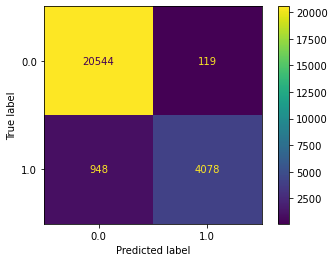

In [ ]:
plot_confusion_matrix(forest_ts, test_x_h2, test_y_h2)